<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/EPD9_cons_elect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# subir los datos:
# Desde Jupyter notebook deberíais escribir esto:
# df=pd.read_excel("C:/........./consumoelect.xlsx")

In [ ]:
# Desde Colab, 1º subir archivo y luego leerlo
df=pd.read_excel("consumoelect.xlsx")

In [ ]:
# 1. Eliminar fila 0
elec=df.iloc[1:].copy()
# 2. Renombrar columnas
elec.rename(columns={"SERIES":"period",
                     'CONSUMO DE ENERGIA ELECTRICA PENINSULAR':"kwh"},
            inplace=True)

In [ ]:
# 3. Preparamos columna period
elec['period']=elec['period'].astype("str") # ponemos en formato string
elec['period']=elec.period.str[:4]+"-"+elec.period.str[-2:]

In [ ]:
# 4. Transformamos period en DateTime
elec['period']=pd.to_datetime(elec.period)
# 5. Establecemos period como index de la tabla
elec.set_index(elec.period,inplace=True)

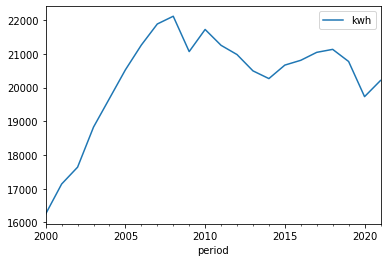

In [ ]:
# Tarea 1
# Crear un gráfico con la media anual de consumo eléctrico a partid de 2000
# hint: usar la función .resample()
medan=elec.loc["2000":"2021"].resample("A").mean() # Dejamos fuera el año 2022 porque está incompleto (!!)
medan.plot()

In [ ]:
# GRÁFICO PROFESIONAL

# 1. Expresamos el eje y en MGh, que es más legible al tener menos ceros.
medan['MWh']=medan.kwh/1000  

# 2. Establecemos el año como index de la tabla, que es mejor que usar el 31/12 de cada año como está actualmente debido al resample.
medan['year']=medan.index.year
medan.set_index(medan.year,inplace=True)

# 3. Establecemos el estilo "seaborn" que nos permite fácilmente hacer un gráfico con formato correcto.
plt.style.use("seaborn")

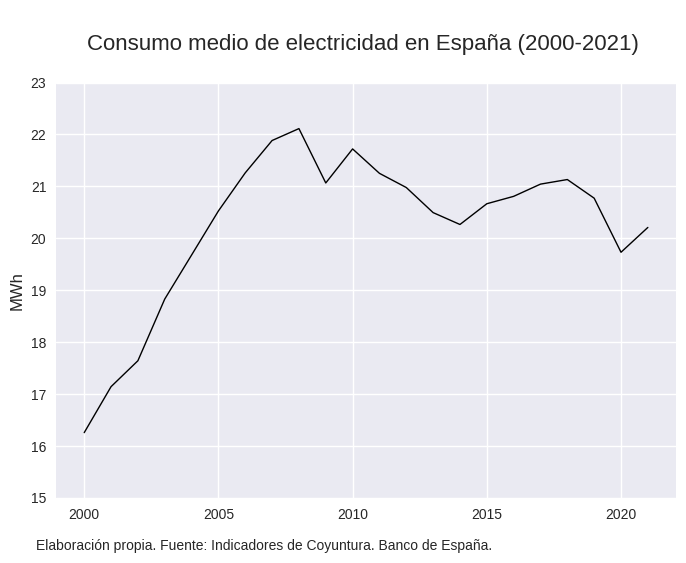

In [ ]:
# 4. Creamos figura con un gráfico
fig,ax=plt.subplots(dpi=100)
ax.plot(medan.MWh, c="black",linewidth=1)
ax.set_ylim(15,23) # para que la línea no acapare todo el gráfico, lo cual no queda bien
ax.set_ylabel("MWh", size=12)
ax.set_title("\nConsumo medio de electricidad en España (2000-2021) \n", size=16)
fig.text(0.1,0.03,"Elaboración propia. Fuente: Indicadores de Coyuntura. Banco de España.", ha="left",fontsize=10) 
plt.savefig("Figure1.png")
plt.show()

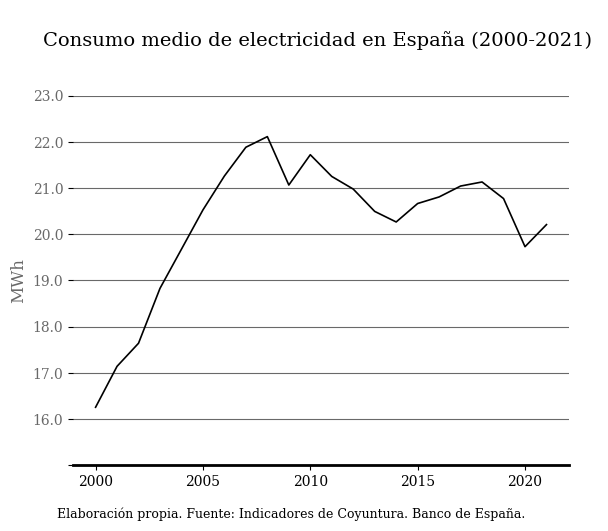

In [ ]:
# GRÁFICO TODAVÍA MÁS PROFESIONAL
plt.style.use("default") # Reestablecemos el estilo por defecto
plt.rc('font', family='serif') # Establecemos el tipo de letras

# 4. Creamos figura con un gráfico
fig,ax=plt.subplots(dpi=100)
ax.plot(medan.MWh, c="black",linewidth=1.2)
ax.set_ylim(15,23) # para que la línea no acapare todo el gráfico, lo cual no queda bien
ax.set_ylabel("MWh", size=12, color="dimgrey")
ax.set_title("\nConsumo medio de electricidad en España (2000-2021) \n\n", size=14)
  # Elimino los borders derecho, superior e izquierdo
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
  # Doy más grosor al borde inferior
ax.spines["bottom"].set_linewidth(2)
  # Añado líneas horizontales
ax.grid(axis='y', color="dimgrey")
ax.set_yticklabels(ax.get_yticks(), color="dimgrey") # lo pongo en gris
plt.setp(ax.get_yticklabels()[0], visible=False) # indico que no se muestre el primer ticklabel
fig.text(0.1,0.00,"Elaboración propia. Fuente: Indicadores de Coyuntura. Banco de España.", ha="left",fontsize=9) 
plt.savefig("Figure1.png")
plt.show()

In [ ]:
# Seleccionando a partir de enero de 2013:
elec=elec["2013":]

In [ ]:
# 1. ¿Cuándo se alcanzó el máximo de consumo eléctrico en la serie bruta? Usad el primer día del mes
elec[elec.kwh==elec.kwh.max()].index[0].strftime("%m/%Y")

'07/2015'

In [ ]:
# 2. ¿Cuándo se alcanzó el mínimo de consumo eléctrico en la serie bruta? Usad el primer día del mes
elec[elec.kwh==elec.kwh.min()].index[0].strftime("%m/%Y")

'04/2020'

In [ ]:
# 3. ¿Cuándo se alcanzó el máximo de consumo eléctrico en la serie desestacionalizada (método STL (argumento robust=True)? Usad el primer día del mes
from statsmodels.tsa.seasonal import STL
ss_stl = STL(elec.kwh,seasonal=13, robust=True).fit()
el_des=elec.kwh-ss_stl.seasonal
el_des[el_des==el_des.max()].index[0].strftime("%m/%Y")

'06/2017'

In [ ]:
# 4. ¿Cuándo se alcanzó el mínimo de consumo eléctrico en la serie desestacionalizada (método STL (argumento robust=True)? Usad el primer día del mes
el_des[el_des==el_des.min()].index[0].strftime("%m/%Y")

'04/2020'

In [ ]:
# 5. Y obviando el año 2020 en vuestra respuesta, ¿cuándo se alcanzó el mínimo de consumo eléctrico en la serie desestacionalizada (método STL (argumento robust=True)?
el_des2=el_des.loc[el_des.index.year!=2020]
el_des2.loc[(el_des2==el_des2.min())].index[0].strftime("%m/%Y")

'10/2022'

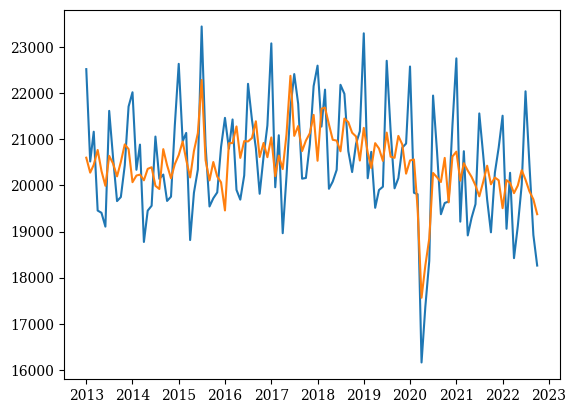

In [ ]:
# Y echamms un vistazo al gráfico
fig,ax=plt.subplots()
ax.plot(elec.kwh)
ax.plot(el_des)
plt.show()